 ## ANALYSIS AND PREDICTION OF THE TESLA STOCK PRICE


This aim of this project is to carry out an analysis on the price of Tesla stocks between 2010 and 2020 to see how the price of Tesla stocks increased overtime, and then build a Linear regression model to predict the closing price of the Tesla stock.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Loading the csv file and printing the first five rows

In [2]:
df = pd.read_csv(r"C:\Users\Tega\Downloads\TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Printing the statistical information of the dataset.

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


Getting more information on the dataset (number of rows, number of columns, null values and Datatype)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Checking for duplicates

In [5]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


There are 2,416 rows and 7 columns in the dataset.
The dataset has no null or duplicate value.

In [6]:
df1 = df.iloc[500:511, 4:6]
df1

,Close,Adj Close
500,32.189999,32.189999
501,33.790001,33.790001
502,33.110001,33.110001
503,31.610001,31.610001
504,31.959999,31.959999
505,31.410000,31.410000
506,31.290001,31.290001
507,30.400000,30.400000
508,30.660000,30.660000
509,31.230000,31.230000


The Close price of Tesla stock is the same as the Adj Close. This means that Tesla does not pay dividend to shareholders.

### Data Visualisation

I want to see how the price of Tesla stock increased over the years. To achieve this, i will have to add a new column to the dataset.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010
...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020


Plotting the trend for opening price

Text(0.5, 1.0, 'Trend for Opening Price of Tesla Stock')

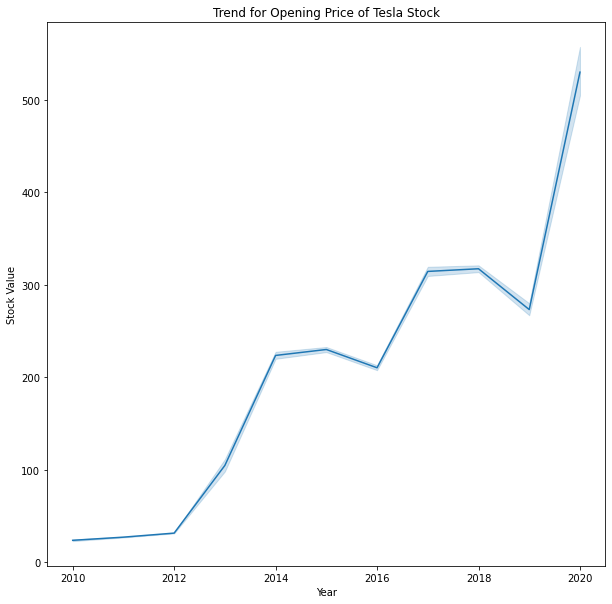

In [8]:
plt.figure(figsize = (10, 10))
sns.lineplot(data = df, x= 'Year', y = 'Open')
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Trend for Opening Price of Tesla Stock")

Plotting the trend for closing price

Text(0.5, 1.0, 'Trend for Opening Close of Tesla Stock')

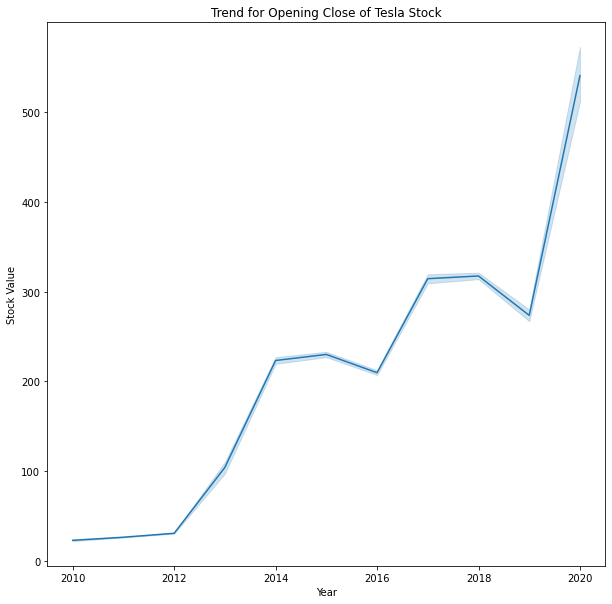

In [9]:
plt.figure(figsize = (10, 10))
sns.lineplot(data = df, x= 'Year', y = 'Close')
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Trend for Opening Close of Tesla Stock")

Plotting the volume of Tesla Stocks over time.

Text(0.5, 1.0, 'Trend for the Volume of Tesla Stock')

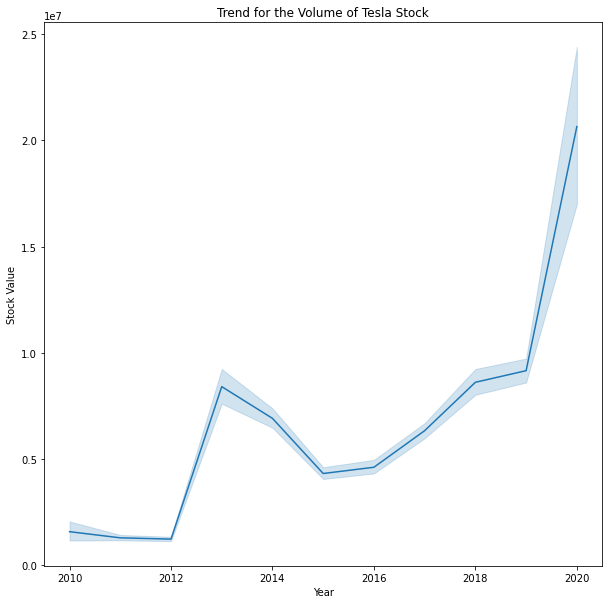

In [10]:
plt.figure(figsize = (10, 10))
sns.lineplot(data = df, x= 'Year', y = 'Volume')
plt.xlabel("Year")
plt.ylabel("Stock Value")
plt.title("Trend for the Volume of Tesla Stock")

Dropping Adj Close, Volume and  Date because they are not needed in building the model

In [11]:
x_and_y = df.drop(columns = ['Adj Close' , 'Volume', 'Date'])


Normalising the data

In [12]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(x_and_y), columns= x_and_y.columns)
X = normalised_df.drop(columns = ['Close'])
Y = normalised_df['Close']

Building the model

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 100)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)


LinearRegression()

In [14]:
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.0021955 , 0.00631305, 0.27250745, 0.31112649, 0.38383518,
       0.24662201, 0.26546612, 0.02504882, 0.39535097, 0.27768583,
       0.2385246 , 0.29011908, 0.38078123, 0.40495353, 0.02161104,
       0.31771241, 0.28008378, 0.72879616, 0.25304586, 0.4290046 ,
       0.2502469 , 0.31005914, 0.01516473, 0.29778002, 0.00886727,
       0.02782575, 0.26707961, 0.26863521, 0.37312259, 0.42546505,
       0.44202249, 0.31113097, 0.03032502, 0.37323588, 0.42786023,
       0.01661526, 0.01858495, 0.31751132, 0.43465044, 0.01521849,
       0.27433536, 0.24114212, 0.49386664, 0.27597117, 0.02124694,
       0.32448972, 0.24769991, 0.38143757, 0.4812738 , 0.43166416,
       0.25615676, 0.01644196, 0.45658532, 0.38094336, 0.02044767,
       0.40066732, 0.37195498, 0.3992461 , 0.28673583, 0.02573367,
       0.41277151, 0.26679283, 0.2468619 , 0.01759857, 0.31056683,
       0.34440327, 0.42708155, 0.13588273, 0.31362746, 0.01096872,
       0.02424322, 0.02819908, 0.00697269, 0.24788483, 0.31435

Getting the Mean Absolute Error

In [15]:
mae= mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.002

Getting the Residual Sum of Squares

In [16]:
rss= np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0.005

Getting the Mean Squared Error

In [17]:
mse = mean_squared_error(y_test, predicted_values)
round(mse, 3)

0.0

Getting the Root Mean Squared Error

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.003

Getting the R2 Score

In [19]:
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

1.0

Comparing the predicted values to the actual values

In [20]:
comparison = pd.DataFrame({'Predicted Values':predicted_values,'Actual Values':y_test})
comparison.head()

,Predicted Values,Actual Values
31,0.002195,0.002355
71,0.006313,0.006059
1016,0.272507,0.275975
1694,0.311126,0.313020
1736,0.383835,0.385436


Plotting the Comparison

<AxesSubplot:>

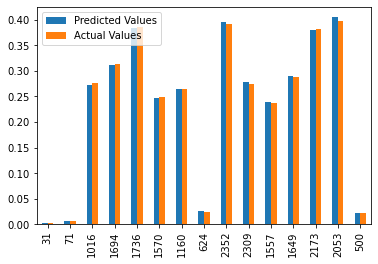

In [21]:
graph = comparison.head(15)
graph.plot(kind='bar')